<a href="https://colab.research.google.com/github/pranabrout/EDA-on-Hotel-Booking/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Getting and Understanding the Data**

In [3]:
# building the data frame
df = pd.read_csv('/content/drive/My Drive/AlmaBetter/Capstone Projects/EDA on Hotel Bookings/Hotel Bookings.csv')
df.head(3) # showing first 3 rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [4]:
df.info() # to get the brief information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

We have total 119390 rows and 32 columns.

In [5]:
# showing all 32 columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [7]:
# creating a copy of the Data Frame so that the original df won't be affected
df1 = df.copy()
df1.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [8]:
df1['hotel'].unique() # to see how many types of hotels in the dataframe

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [9]:
df1['arrival_date_year'].unique() # to see the years available in the df

array([2015, 2016, 2017])

In [10]:
# types of meals
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

BB - (Bed and Breakfast)

HB- (Half Board)

FB- (Full Board)

SC- (Self Catering)

In [11]:
df1['market_segment'].unique()  # different types of markets available

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [12]:
df1['distribution_channel'].unique()  # different types of channels

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [13]:
# converting object type to datetime
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')

**Cleaning the Data**-
Data cleaning is necessary before EDA as it will remove the ambigous data that can affect the result of our EDA.

In [14]:
# checking for the duplicate rows
df1.duplicated().value_counts()    # True means duplicate rows

False    87396
True     31994
dtype: int64

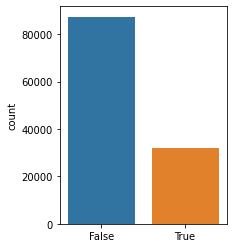

In [15]:
# Visulizing through Count pot
plt.figure(figsize=(3,4))
sns.countplot(x=df1.duplicated())

In [16]:
# Removing/dropping the duplicate rows
df1.drop_duplicates(inplace = True)

In [17]:
# showing the number of rows and columns of the dataframe after removing the duplicate values
df1.shape

(87396, 32)

In [18]:
# checking for Null Values
df1.isna().sum().sort_values(ascending=False)[:5]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

In [19]:
# we have Null values in columns- Company, agent, Country,children

# Replacing null values with 0 for agent, children & company.
null_columns=['agent','children','company']
for i in null_columns:
  df1[i].fillna(0,inplace=True)

# Replacing null values with 'others' for country column
df1['country'].fillna('others',inplace=True)  

Successfully handled the null values

In [20]:
# checking for Null Values again
df1.isna().sum().sort_values(ascending=False)[:5]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

In [21]:
# droppping all 166 rows in which addition of adults ,children and babies is 0. That simply means  no bookings were made.
len(df1[df1['adults']+df1['babies']+df1['children']==0])
df1.drop(df1[df1['adults']+df1['babies']+df1['children']==0].index,inplace=True)

In [22]:
# Checking the unique values in categorical columns.
categorical_cols=list(set(df1.drop(columns=['reservation_status_date','country','arrival_date_month']).columns)-set(df1.describe()))
for col in categorical_cols:
  print(f'Unique values in column {col} are:, {(df1[col].unique())}')

Unique values in column market_segment are:, ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Unique values in column deposit_type are:, ['No Deposit' 'Refundable' 'Non Refund']
Unique values in column reserved_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']
Unique values in column distribution_channel are:, ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values in column hotel are:, ['Resort Hotel' 'City Hotel']
Unique values in column customer_type are:, ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values in column assigned_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']
Unique values in column reservation_status are:, ['Check-Out' 'Canceled' 'No-Show']
Unique values in column meal are:, ['BB' 'FB' 'HB' 'SC' 'Undefined']


In [23]:
# Adding some new columns
df1['total_people'] = df1['adults'] + df1['babies'] + df1['children']   
df1['total_stay'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']

In [24]:
df1.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0


**Exploratory Data Analysis**

*Univariate Analysis*

1) Which type of hotel is mostly prefered by the guests?

Text(0.5, 1.0, 'Pie Chart for Most Preffered  Hotel')

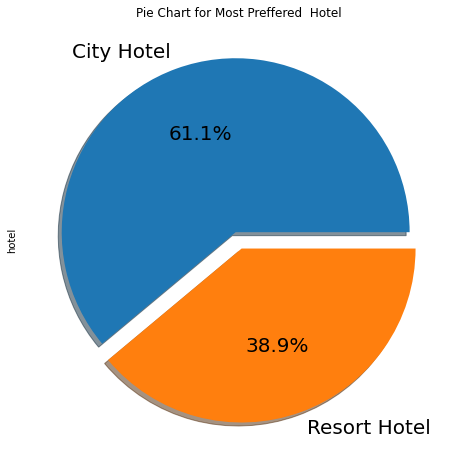

In [25]:
# Visualizsing by Pie chart.
df1['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)   
plt.title('Pie Chart for Most Preffered  Hotel')

City hotels are mostly preffered by the guests.

2) Which Agent made the most bookings?

In [26]:
# Highest bookings made by agents
highest_bookings= df1.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

# As agent 0 was NAN value and we replaced it with 0 and indicates no bookings, so droping it,
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True) 

# Taking top-10 agents by their bookings made
top_ten_highest_bookings=highest_bookings[:10]

top_ten_highest_bookings

,agent,Most_Bookings
9,9.0,28721
174,240.0,13028
14,14.0,3342
7,7.0,3294
183,250.0,2779
175,241.0,1644
27,28.0,1493
8,8.0,1383
1,1.0,1228
6,6.0,1117


Agent ID no:9 made most of the bookings

Text(0.5, 1.0, 'Most Bookings done by the agent')

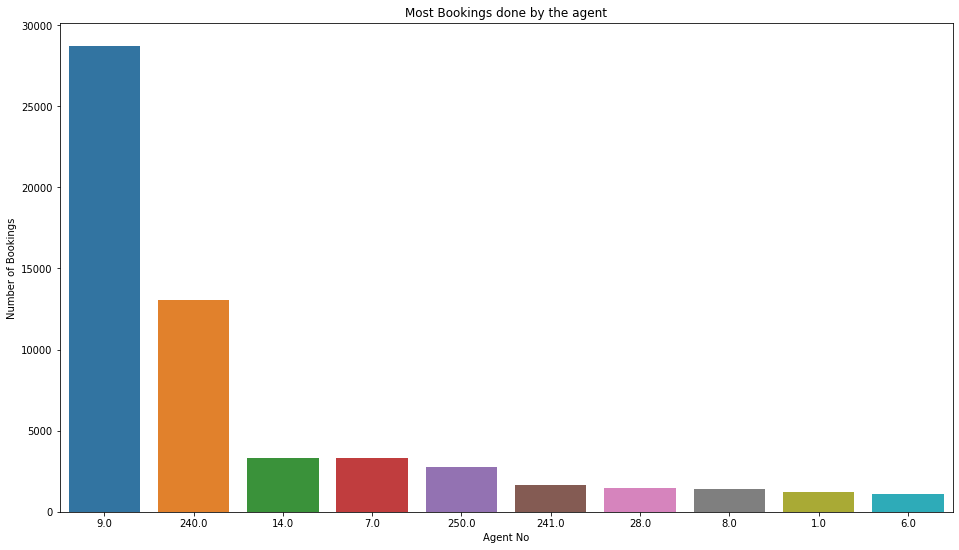

In [27]:
# Plotting the graph
plt.figure(figsize=(16,9))
sns.barplot(x=top_ten_highest_bookings['agent'],y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings done by the agent")

3) Getting the pecentage of cancellation.

Text(0.5, 1.0, 'Canceled as 1 and Uncanceled as 0')

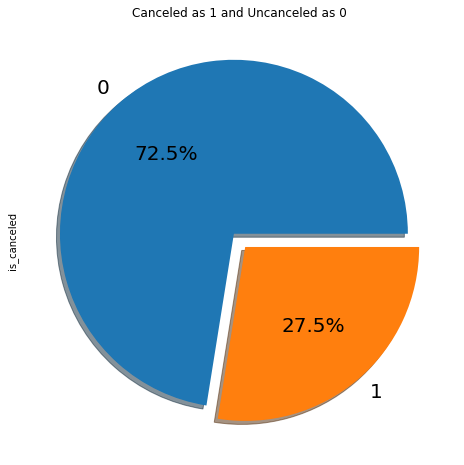

In [28]:
# preparing a pie chart to show the cancellation percentage
df1['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title("Canceled as 1 and Uncanceled as 0")

27.5% of the bookings were cancelled.

**4) Percentage of repeated guests**

Text(0.5, 1.0, 'Percentgae of repeated guests')

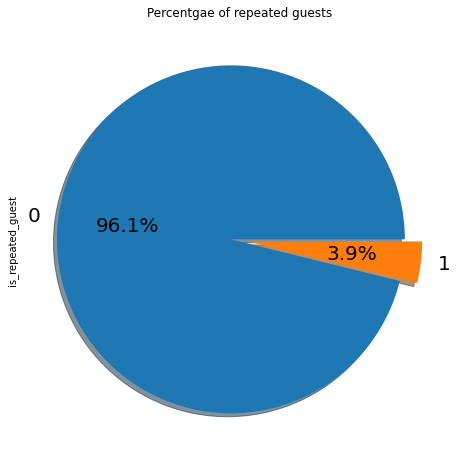

In [29]:
df1['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(10,8),fontsize=20)

plt.title("Percentgae of repeated guests") # 1 indicates repeated guests

Repeated guests are so less which is only 3.9%.

Need to work on guest management.

**5) Percentage distribution of "Customer Type"**

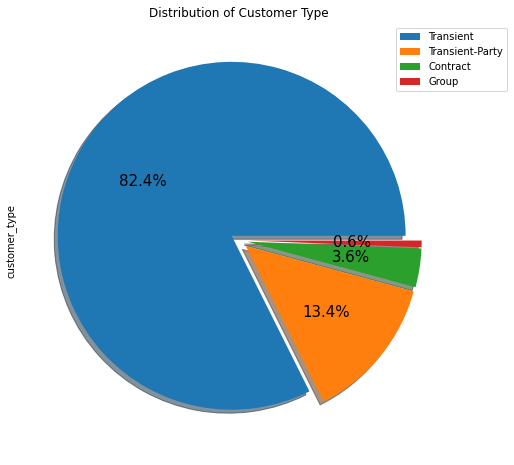

In [30]:
df1['customer_type'].value_counts().plot.pie(explode=[0.05]*4,shadow=True,autopct='%1.1f%%',figsize=(10,8),fontsize=15,labels=None)

labels=df1['customer_type'].value_counts().index.tolist()
plt.title('Distribution of Customer Type')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

Transient customer type is more which is 82.4%. Percentage of Booking associated by the Group is vey low.

**6) Distribution of required_car_parking_spaces in Percentage**

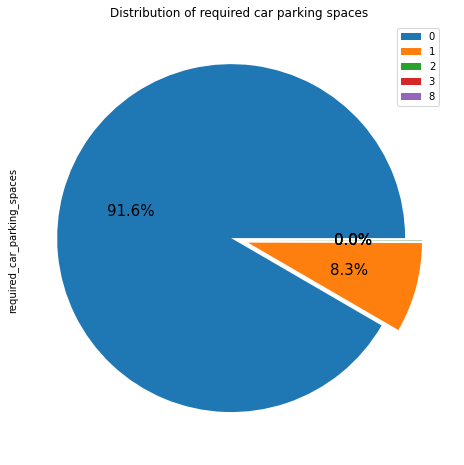

In [31]:
df1['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=None)

labels=df1['required_car_parking_spaces'].value_counts().index
plt.title('Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

91.6% of guests did not require any parking space. Only 8.3% of guests required 1 parking space each.

**7) Percentage of booking changes made by the customers.**

Text(0, 0.5, 'Percentage(%)')

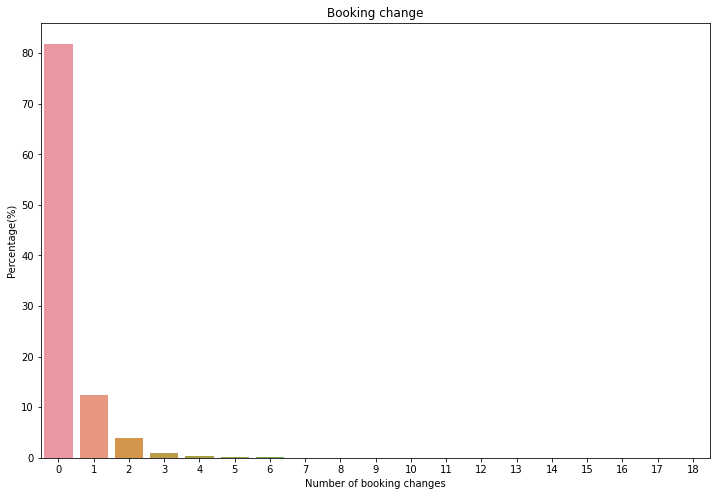

In [33]:
booking_changes_df=df1['booking_changes'].value_counts().reset_index().rename(columns={'index': "number_booking_changes",'booking_changes':'Counts'})

plt.figure(figsize=(12,8))
sns.barplot(x=booking_changes_df['number_booking_changes'],y=booking_changes_df['Counts']*100/df1.shape[0])
plt.title('Booking change')
plt.xlabel('Number of booking changes')
plt.ylabel('Percentage(%)')

Almost 82% of the bookings were not changed by guests.

**8) Percentage distribution of Deposite type.**

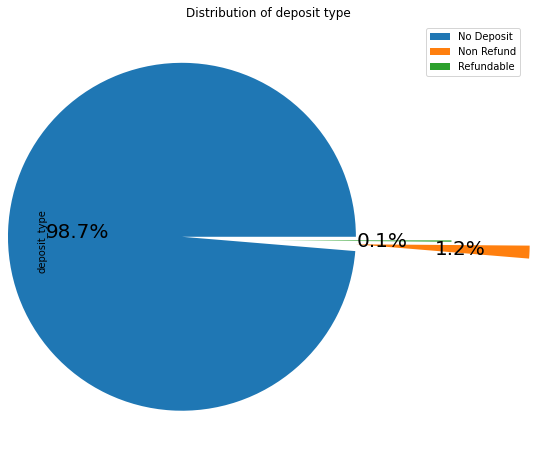

In [35]:
df1['deposit_type'].value_counts().plot.pie(explode=(0.5,0.5,0.05),autopct='%1.1f%%',shadow=False,figsize=(14,8),fontsize=20,labels=None)
plt.title("Distribution of deposit type")
labels=df1['deposit_type'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

98.7% of the guests prefer "No deposit" type of deposit.

**9) Type of food mostly preferred by the guests.**

Text(0.5, 1.0, 'Preferred Meal Type')

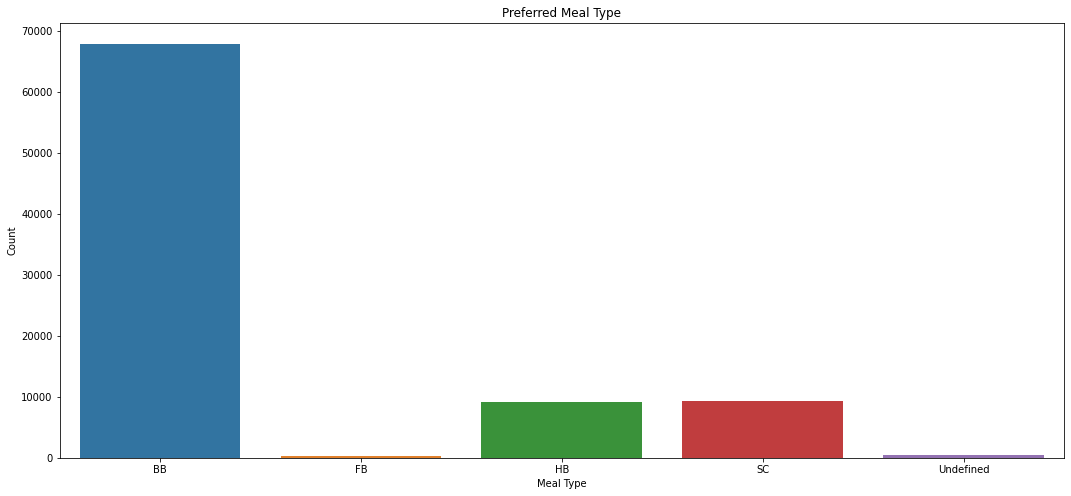

In [36]:
plt.figure(figsize=(18,8))
sns.countplot(x=df1['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")

So the most preferred meal type by the guests is BB(Bed and Breakfast).

**10) From which country the most number of guests are coming?**

Text(0.5, 1.0, 'Number of guests from diffrent Countries')

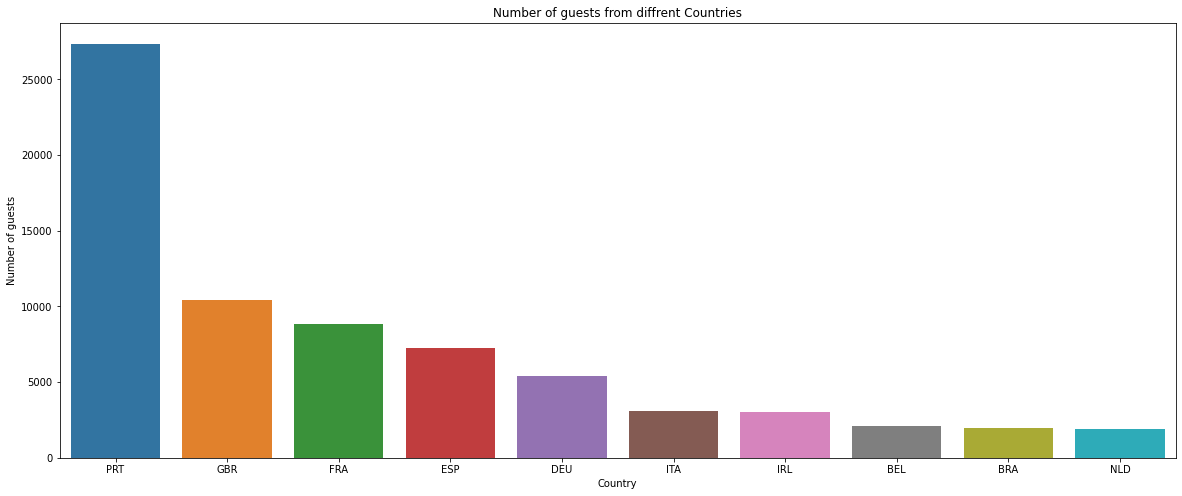

In [38]:
country_df=df1['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]

# Visualizing by plotting the graph
plt.figure(figsize=(20,8))
sns.barplot(x=country_df['country'],y=country_df['count of guests'])
plt.xlabel('Country')
plt.ylabel('Number of guests')
plt.title("Number of guests from diffrent Countries")

Most of the guests are coming from Portugal.

**11) Most preferred room type by the customers.**

Text(0.5, 1.0, 'Most preferred Room type')

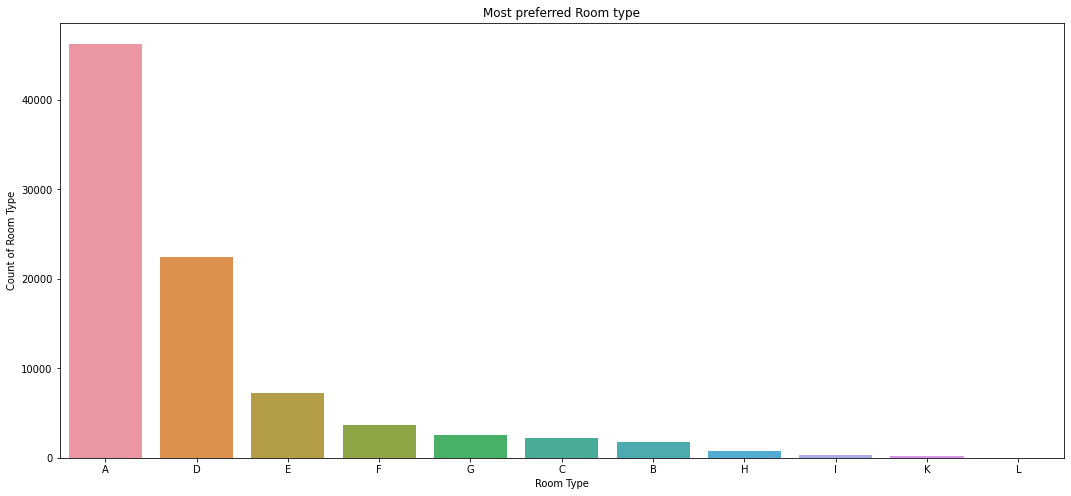

In [39]:
plt.figure(figsize=(18,8))

#plotting 
sns.countplot(x=df1['assigned_room_type'],order=df1['assigned_room_type'].value_counts().index)
#  set xlabel for the plot
plt.xlabel('Room Type')
# set y label for the plot
plt.ylabel('Count of Room Type')
#set title for the plot
plt.title("Most preferred Room type")

So the most preferred Room type is "A".

**12) The month in which most of the bookings happened.**

In [40]:
# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=df1.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# Creating list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# creating df which will map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df

,arrival_date_month,Counts
4,January,4685
3,February,6083
7,March,7489
0,April,7900
8,May,8344
6,June,7756
5,July,10043
1,August,11242
11,September,6682
10,October,6921


Text(0, 0.5, 'Number of bookings')

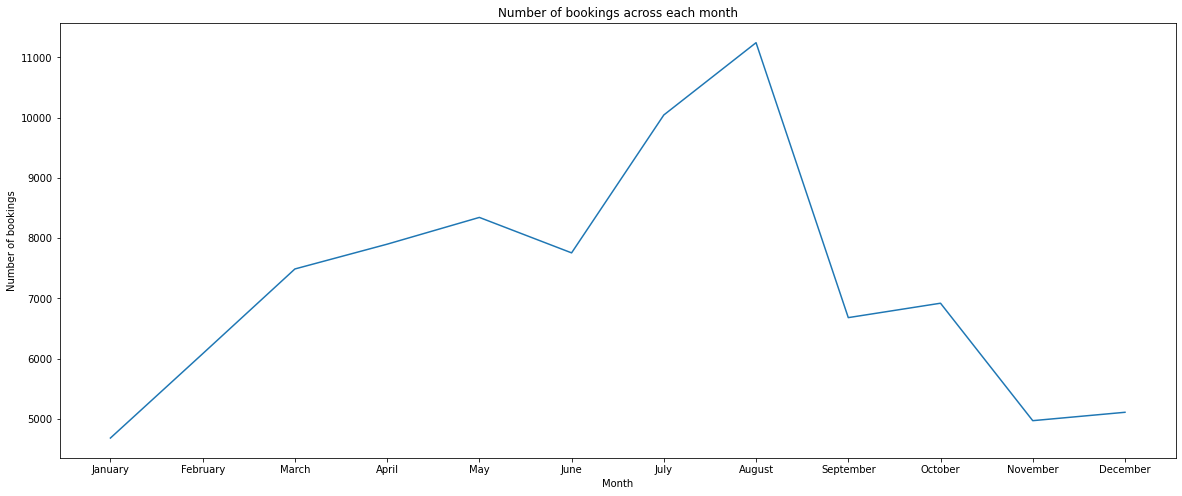

In [41]:

plt.figure(figsize=(20,8))

sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])
plt.title('Number of bookings across each month')
plt.xlabel('Month')
plt.ylabel('Number of bookings')

July and August had the most Bookings.

**13) Distribution channel which is mostly used for hotel bookings**

Text(0.5, 1.0, ' Mostly Used Distribution Channel for Hotel Bookings ')

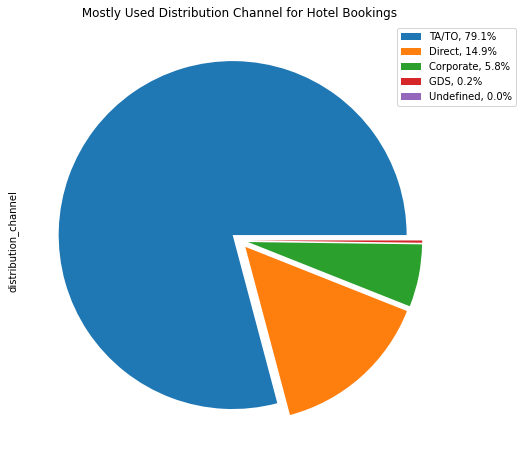

In [42]:
# Visualizing by pie chart.

labels=df1['distribution_channel'].value_counts().index.tolist()

# creating new df of distribution channel
distribution_channel_df=df1['distribution_channel'].value_counts().reset_index().rename(columns={'index':"distribution_channel",'distribution_channel':'count'})

#adding percentage columns to the distribution_channel_df
distribution_channel_df['percentage']=round(distribution_channel_df['count']*100/df1.shape[0],1)

#Creating list of percentage
sizes=distribution_channel_df['percentage'].values.tolist()

#plotting the piw chart
df1['distribution_channel'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], shadow=False, figsize=(15,8),fontsize=10,labels=None)   

# setting legends with the percentage values
labels = [f'{l}, {s}%' for l, s in zip(labels, sizes)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.title(' Mostly Used Distribution Channel for Hotel Bookings ')

'TA/TO' is mostly used for booking hotels. (i.e, 79.1%)

**14) Year having the highest bookings.**

Text(0.5, 1.0, 'Year Wise bookings')

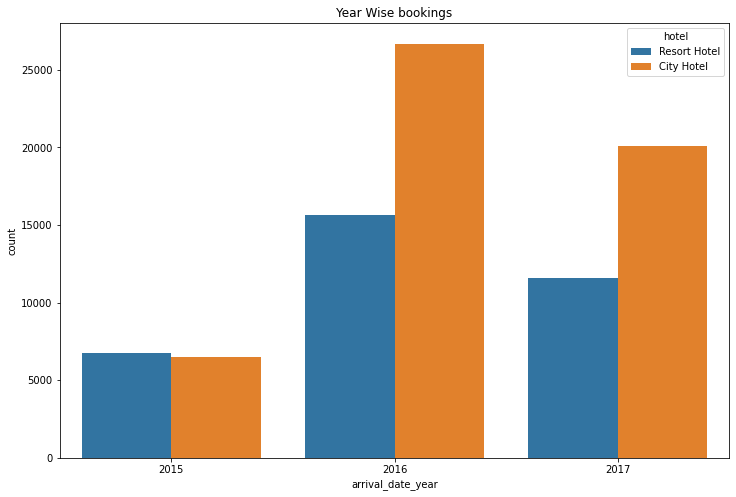

In [43]:
plt.figure(figsize=(12,8))

# Plotting with countplot
sns.countplot(x=df1['arrival_date_year'],hue=df1['hotel'])
plt.title("Year Wise bookings")

2016 had the most bookings.

2015 had the lowest bookings.

In tolal, City hotels had the most of the bookings.

***Bivariate and Multivariate Analysis***

In [44]:
# Creating a dataframe, Grouping by hotels
group_by_hotel=df1.groupby('hotel')

**1) Hotel type having the highest ADR.**

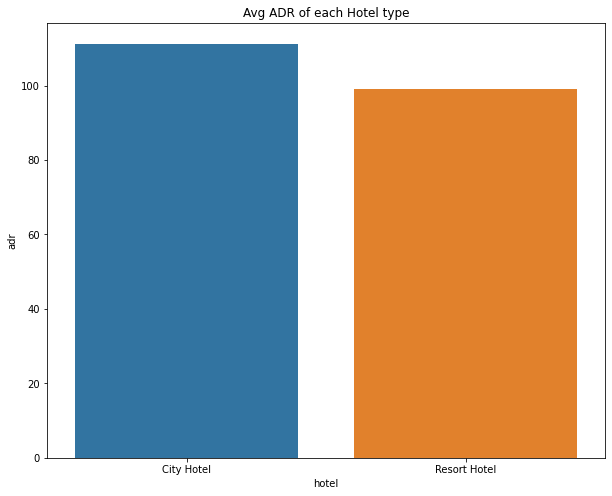

In [45]:
#grouping by hotel adr
highest_adr=group_by_hotel['adr'].mean().reset_index()

#set plot size
plt.figure(figsize=(10,8))

# set labels
plt.xlabel('Hotel type')
plt.ylabel('ADR')
plt.title("Avg ADR of each Hotel type")

#plot the graph
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])

City hotel has the highest ADR. That means city hotels are generating more revenues than the resort hotels.

**2) Hotel type having the most lead time.**

Text(0.5, 1.0, 'Average Lead Time for each Hotel type')

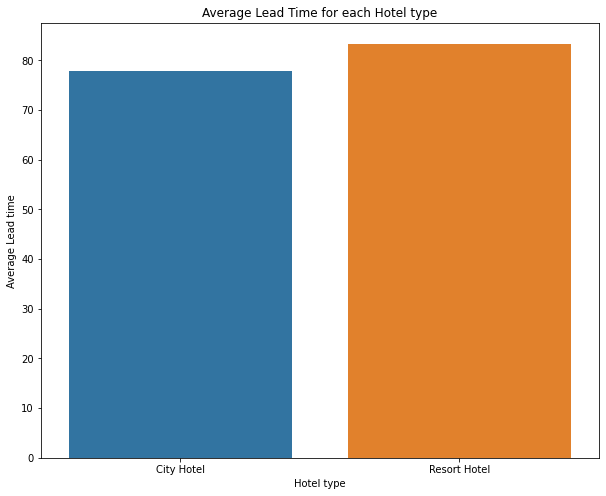

In [46]:
avg_lead_time=group_by_hotel['lead_time'].mean().reset_index()

plt.figure(figsize=(10,8))

# plotting the bar plot
sns.barplot(x=avg_lead_time['hotel'],y=avg_lead_time['lead_time'])
plt.xlabel('Hotel type')
plt.ylabel('Average Lead time')
plt.title("Average Lead Time for each Hotel type")

Resort hotels has slightly high avg lead time. That means customers plan their trips very early.

**3) Hotel type having highest percentage of booking cancellation.**

Text(0.5, 1.0, 'Percentage of booking cancellation')

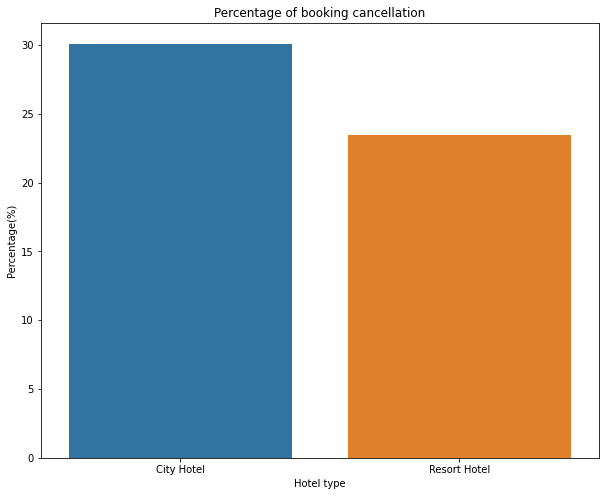

In [47]:
# creating new DataFrame where bookings are cancelled.
canceled_df=df1[df1['is_canceled']==1]

# Grouping by hotel
canceled_df=canceled_df.groupby('hotel').size().reset_index().rename(columns={0: "no_of_cancelled_bookings"})

# adding 'total booking column for calculating the percentage.
canceled_df['total_booikngs']=df1.groupby('hotel').size().reset_index().rename(columns={0:"total_bookings"}).drop('hotel',axis=1)
canceled_df

#plotting the barchat
plt.figure(figsize=(10,8))
sns.barplot(x=canceled_df['hotel'],y=canceled_df['no_of_cancelled_bookings']*100/canceled_df['total_booikngs'])

plt.xlabel('Hotel type')
plt.ylabel('Percentage(%)')
plt.title("Percentage of booking cancellation")

City hotels have more cancelation.

**4) Hotel having longer waiting time.**

Text(0.5, 1.0, 'Waiting time for each hotel type')

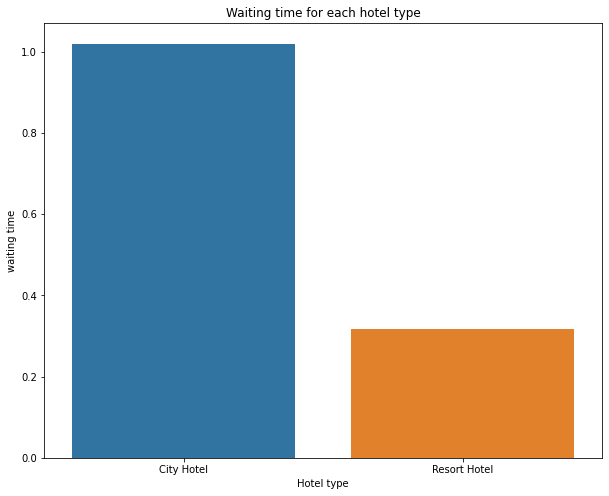

In [48]:
# grouping by hoetl and taking mean of days in waiting list
waiting_time_df=df1.groupby('hotel')['days_in_waiting_list'].mean().reset_index()

plt.figure(figsize=(10,8))

# plot barchart
sns.barplot(x=waiting_time_df['hotel'],y=waiting_time_df['days_in_waiting_list'])

plt.xlabel('Hotel type')
plt.ylabel('waiting time')
plt.title("Waiting time for each hotel type")

City Hotels have longer waiting period than the Resort Hotels. Thus we can say that City Hotels are much busier than the Resort Hotels

**5) Hotels having the most repeated guests.**

Text(0.5, 1.0, 'Most repeated guests for each hotel')

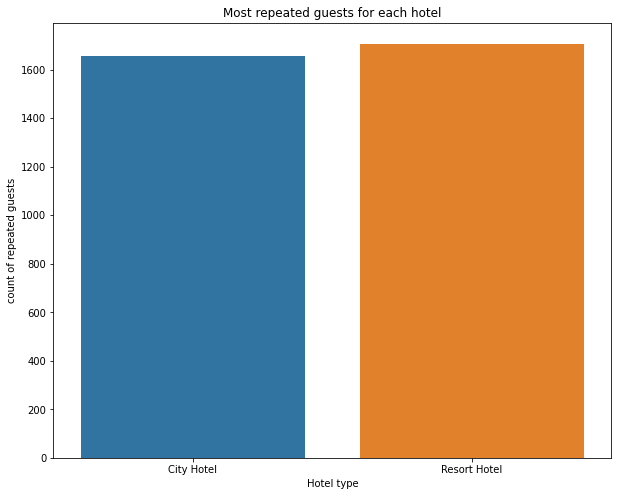

In [49]:
repeated_guests_df=df1[df1['is_repeated_guest']==1].groupby('hotel').size().reset_index().rename(columns={0:'number_of_repated_guests'})

#set plot size adn plot barplot
plt.figure(figsize=(10,8))
sns.barplot(x=repeated_guests_df['hotel'],y=repeated_guests_df['number_of_repated_guests'])

plt.xlabel('Hotel type')
plt.ylabel('count of repeated guests')
plt.title("Most repeated guests for each hotel")

Resort Hotel has slightly more repeated guests than the City Hotels. It is almost similar for both hotels.

**ADR across the different months.**

In [50]:
bookings_by_months_df=df1.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()
#creating month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']   # it will take the order of the month list in the df along with values
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
#sorting
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df

,arrival_date_month,hotel,adr
8,January,City Hotel,85.269875
9,January,Resort Hotel,49.181693
6,February,City Hotel,89.266427
7,February,Resort Hotel,54.102809
15,March,Resort Hotel,57.590889
14,March,City Hotel,95.193911
0,April,City Hotel,117.314134
1,April,Resort Hotel,79.283805
17,May,Resort Hotel,80.551101
16,May,City Hotel,128.055724


Text(0, 0.5, 'ADR')

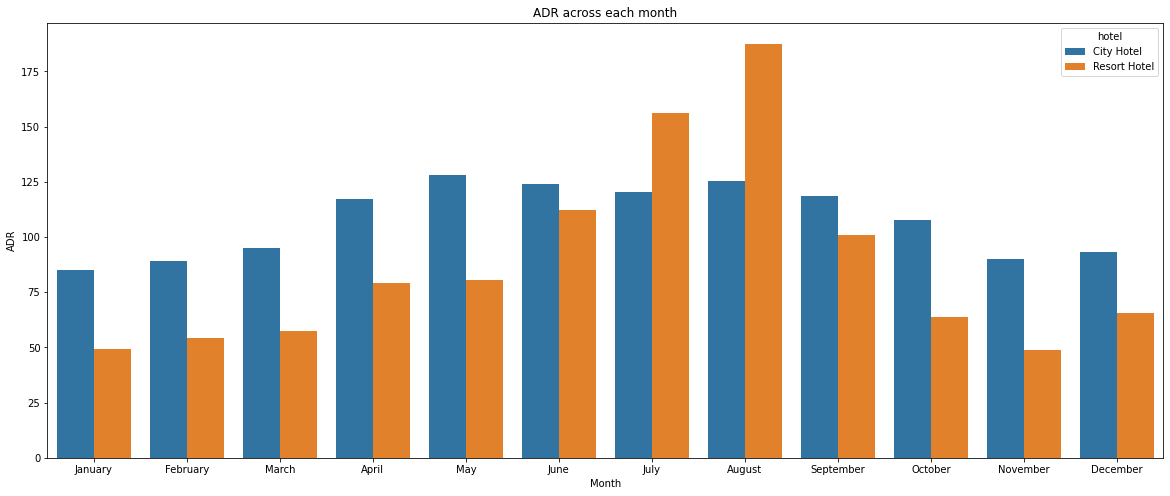

In [51]:
plt.figure(figsize=(20,8))
sns.barplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['adr'],hue=bookings_by_months_df['hotel'])

# setting lables
plt.title('ADR across each month')
plt.xlabel('Month')
plt.ylabel('ADR')

For Resrot hotels, ADR is high in the month of June, July, August as compared to City Hotels. May be Guests wants to spend their Summer vaccation in Resorts Hotels.

The best time for guests to visit Resort or City hotels is January, February, March, April, October, November and December as the average daily cost in these months is very low.

**7) Distribution channels contributed more to ADR in order to increase the the income.**

Text(0.5, 1.0, 'ADR across Distribution channels')

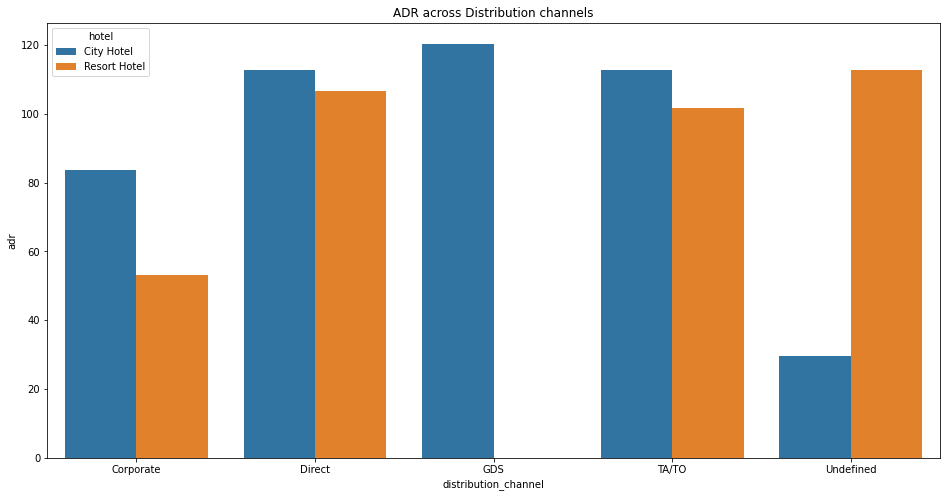

In [52]:
distribution_channel_df=df1.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

plt.figure(figsize=(16,8))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_df, hue='hotel')
plt.title('ADR across Distribution channels')

Corporate- These are corporate hotel booing companies which makes bookings possible.

GDS-A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.

Direct- means that bookings are directly made with the respective hotels

TA/TO- means that booings are made through travel agents or travel operators.

Undefined- Bookings are undefined. may be customers made their bookings on arrival.

From the plot is clear that
'Direct' and 'TA/TO' has almost equally contributed in ADR in both type of hotels i.e. 'City Hotel' and 'Resort Hotel'.

GDS has highly contributed in ADR in 'City Hotel' type.

GDS needs to increase Resort Hotel bookings.

**8) Distribution channel having the higest rate of cancellation.**

In [56]:
canceled_df=df1[df1['is_canceled']==1] # 1= canceled

#group by distribution channel
canceled_df=canceled_df.groupby(['distribution_channel','hotel']).size().reset_index().rename(columns={0:'Counts'})
canceled_df


,distribution_channel,hotel,Counts
0,Corporate,City Hotel,330
1,Corporate,Resort Hotel,316
2,Direct,City Hotel,971
3,Direct,Resort Hotel,952
4,GDS,City Hotel,36
5,TA/TO,City Hotel,14694
6,TA/TO,Resort Hotel,6706
7,Undefined,City Hotel,4


Text(0.5, 1.0, 'Cancellation Rate Vs Distribution channel')

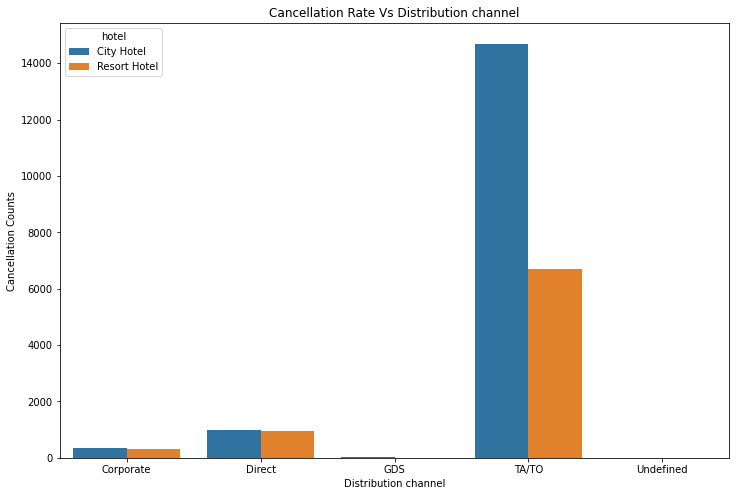

In [57]:
#set plot size and plot barchart 
plt.figure(figsize=(12,8))
sns.barplot(x='distribution_channel',y='Counts',hue="hotel",data=canceled_df)

# set labels
plt.xlabel('Distribution channel')
plt.ylabel('Cancellation Counts')
plt.title('Cancellation Rate Vs Distribution channel')

In "TA/TO", City hotels has the high cancellation rate compared to resort hotels.

In "direct" both the hotels has almost same cancellation rate.

**9) Market Segment having the higest cancellation rate.**

In [58]:
market_segment_df=df1[df1['is_canceled']==1]   # canceled=1
market_segment_df
market_segment_df=market_segment_df.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})   # group by

market_segment_df

,market_segment,hotel,counts
0,Aviation,City Hotel,45
1,Complementary,City Hotel,54
2,Complementary,Resort Hotel,31
3,Corporate,City Hotel,263
4,Corporate,Resort Hotel,246
5,Direct,City Hotel,912
6,Direct,Resort Hotel,825
7,Groups,City Hotel,887
8,Groups,Resort Hotel,445
9,Offline TA/TO,City Hotel,1257


Text(0.5, 1.0, 'Cancellation Rate Vs Market Segment')

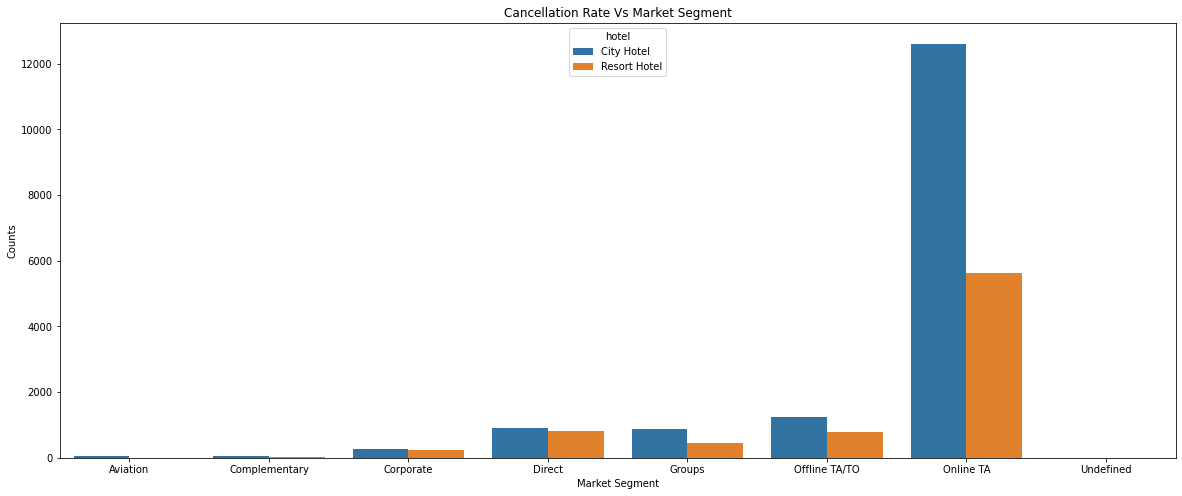

In [59]:
plt.figure(figsize=(20,8))
sns.barplot(x='market_segment',y='counts',hue="hotel",data= market_segment_df)

# set labels
plt.xlabel('Market Segment')
plt.ylabel('Counts')
plt.title('Cancellation Rate Vs Market Segment')

Online T/A' has the highest cancellation in both type of cities.
In order to reduce the booking cancellations hotels need to set the refundable/ no refundable and deposit policies policies.


**10) Does the guests alloted with the same room type which was reserved by them?**

In [60]:
# Defining a function for the reserved room type is same  or not as  assigned room type
def same_room_allotment(x):    
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

             percentage
is_canceled            
0             19.572610
1              2.565705


([<matplotlib.axis.XTick at 0x7f4794bf3b90>,
 [Text(0, 0, 'Not canceled'), Text(0, 0, 'canceled')])

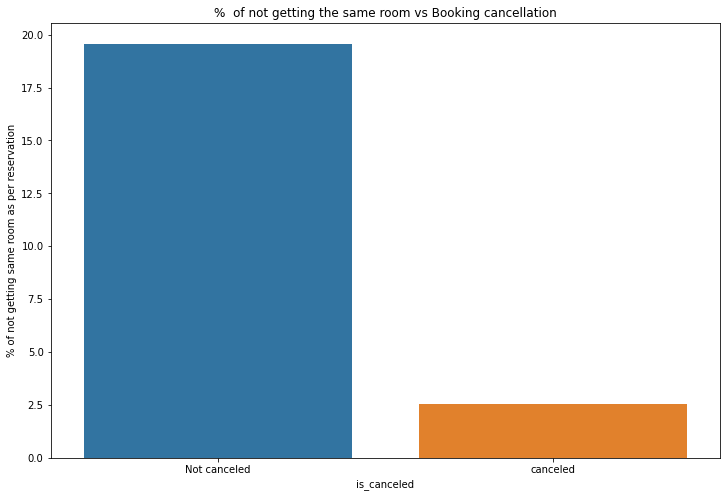

In [61]:
# creating a new column to df1
df1['Same_room_alloted_or_not']=df1.apply(lambda x: same_room_allotment(x),axis=1)

# groupby is_canceled
grp_by_canceled_df=df1.groupby('is_canceled')

# creating DF and calculating percentage of same room alloted  or not
DF=pd.DataFrame(grp_by_canceled_df['Same_room_alloted_or_not'].sum()*100/grp_by_canceled_df.size()).rename(columns={0:"percentage"})
print(DF)

#set plot size and plot barchart
plt.figure(figsize=(12,8))
sns.barplot(x=DF.index,y=DF['percentage'])

# set labels
plt.title('%  of not getting the same room vs Booking cancellation')
plt.xlabel('is_canceled')
plt.ylabel('% of not getting same room as per reservation')
plt.xticks([0,1],['Not canceled','canceled'])

It's clear that there is no much(2.5%) effect on cancellation of the bookings even if the guests are not assigned with rooms which they reserved during booking.

**11) ADR across different market segment.**

Text(0.5, 1.0, 'Adr across market segment')

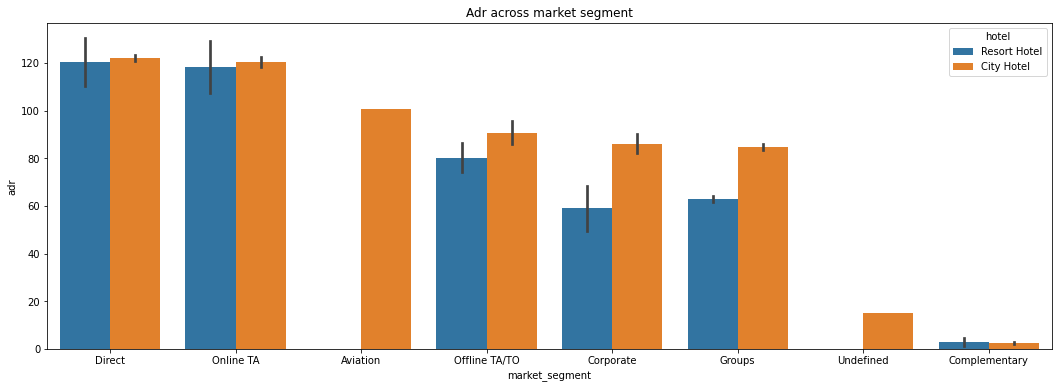

In [62]:
Grupby=df1.groupby(['market_segment','hotel','is_canceled'])['adr'].mean().reset_index()   # group by

# set plot size and plto barchart
plt.figure(figsize=(18,6))
sns.barplot(x='market_segment',y='adr',hue='hotel',data=Grupby.sort_values(by='adr',ascending=False))
plt.title('Adr across market segment')

'Direct' and 'Online TA' are contributing the most in both types of hotels.

Aviation segment should focus on increasing the bookings of 'City Hotel'

**12) Optimal stay length in both types of hotels.**

In [63]:
stay = df1.groupby(['total_stay', 'hotel']).agg('count').reset_index()   # group by total stay and hotel
stay = stay.iloc[:,:3]                                                   # taking 1st 3 columns
stay = stay.rename(columns={'is_canceled':'Number of stays'})    # rename the columns

Text(0.5, 0, 'total_stay(days)')

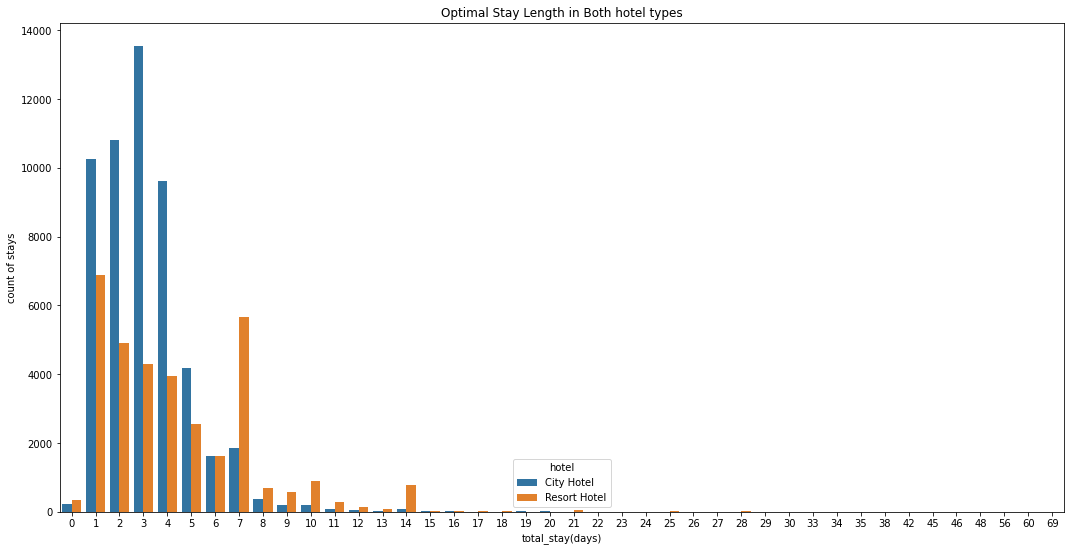

In [64]:
plt.figure(figsize=(18,9))
sns.barplot(x='total_stay',y='Number of stays',hue='hotel',data=stay)

plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('total_stay(days)')

Optimal stay in both the type hotel is less than 7 days.

**13) Relationship between ADR and total stay.**

In [65]:
# Groupby adr,total,stay,hotel,
adr_vs_stay = df1.groupby(['total_stay', 'adr','hotel']).agg('count').reset_index()
adr_vs_stay = adr_vs_stay.iloc[:, :3]
adr_vs_stay = adr_vs_stay.rename(columns={'is_canceled':'Number of stays'})
adr_vs_stay=adr_vs_stay[:18000]
adr_vs_stay

,total_stay,adr,hotel
0,0,0.00,City Hotel
1,0,0.00,Resort Hotel
2,1,0.00,City Hotel
3,1,0.00,Resort Hotel
4,1,1.00,City Hotel
...,...,...,...
17995,7,212.06,City Hotel
17996,7,212.10,Resort Hotel
17997,7,212.14,Resort Hotel
17998,7,212.29,City Hotel


Text(0.5, 1.0, 'Relationship between adr and total stay')

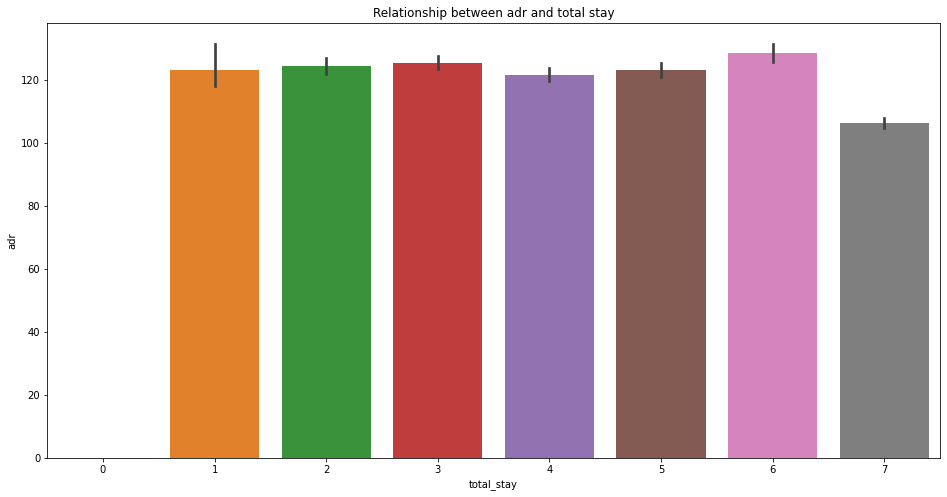

In [66]:
# Plotting the chart
plt.figure(figsize=(16,8))
sns.barplot(x='total_stay',y='adr',data=adr_vs_stay)
plt.title('Relationship between adr and total stay')

As the total stay increases the ADR also increases.

**Co-relation of the columns:**

Text(0.5, 1.0, 'Co-relation of the columns')

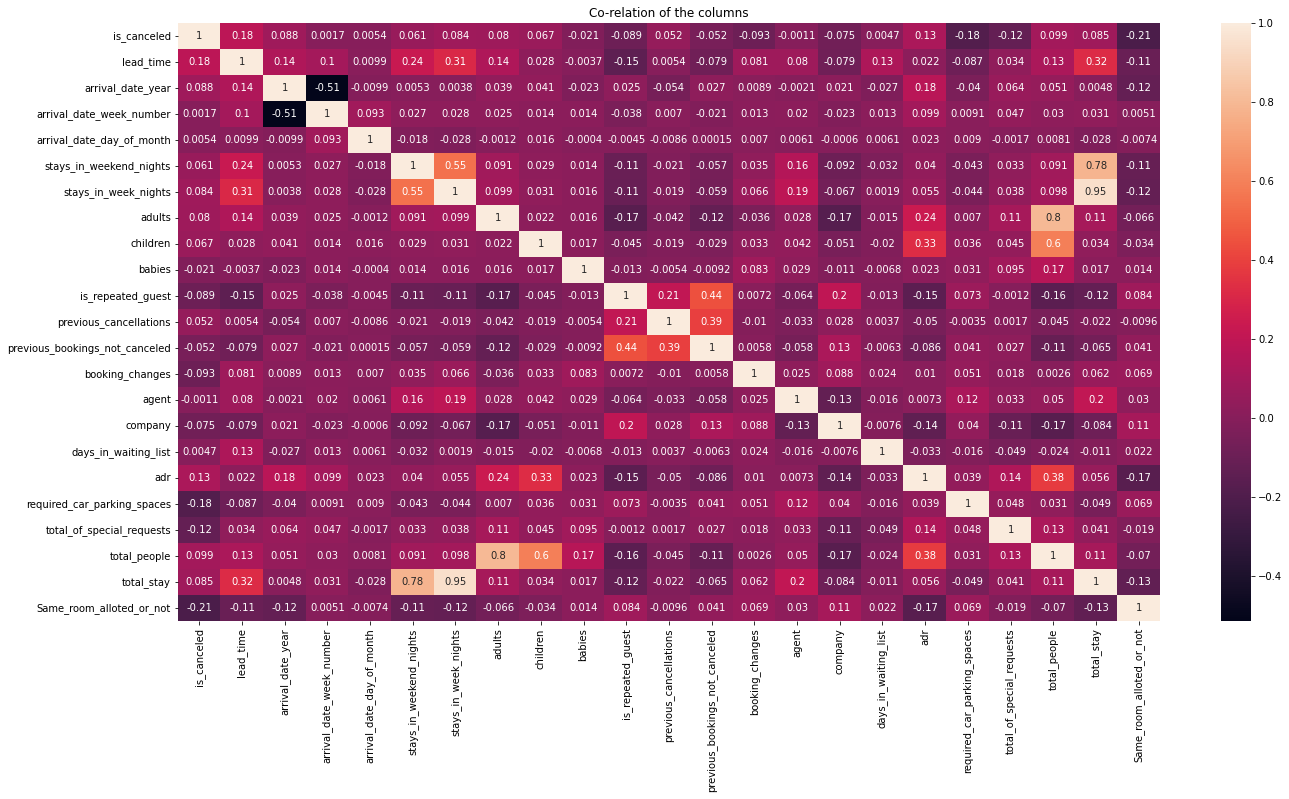

In [67]:
# Showing with Heat map
plt.figure(figsize=(22,11))
sns.heatmap(df1.corr(),annot=True)
plt.title('Co-relation of the columns')

i) is_canceled and same_room_alloted_or_not are negatively corelated. That means customer is unlikely to cancel his bookings if he don't get the same room as per reserved room. We have visualized it above.

ii) lead_time and total_stay is positively corelated.That means more is the stay of cutsomer more will be the lead time.

iii)adults,childrens and babies are corelated to each other. That means more the people more will be adr.

iv) is_repeated guest and previous bookings not canceled has strong corelation. may be repeated guests are not more likely to cancel their bookings.

**Relationship between the Repeated Guests and Previous Bookings not Canceled:**

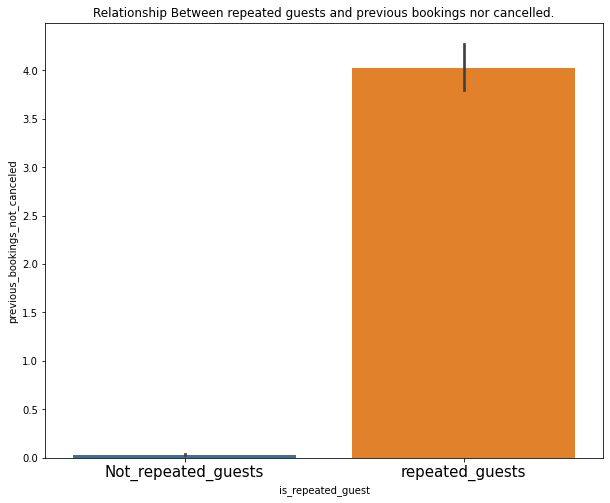

In [68]:
repeated_guests_df=df1[df1['is_repeated_guest']==1]
repeated_guests_df_1=df1[df1['is_repeated_guest']==0]
# Plotting the graph
plt.figure(figsize=(10,8))
sns.barplot(x=df1['is_repeated_guest'],y= df1['previous_bookings_not_canceled'])
plt.xticks([0,1],['Not_repeated_guests','repeated_guests'],fontsize=15)
plt.title('Relationship Between repeated guests and previous bookings nor cancelled.')
plt.show()

Not Repeated Guests are more likely to cancel their bookings.

In [69]:
df1.drop(df1[df1['adr'] > 5000].index, inplace = True)

Text(0.5, 1.0, 'Relationship between  adr and total stay')

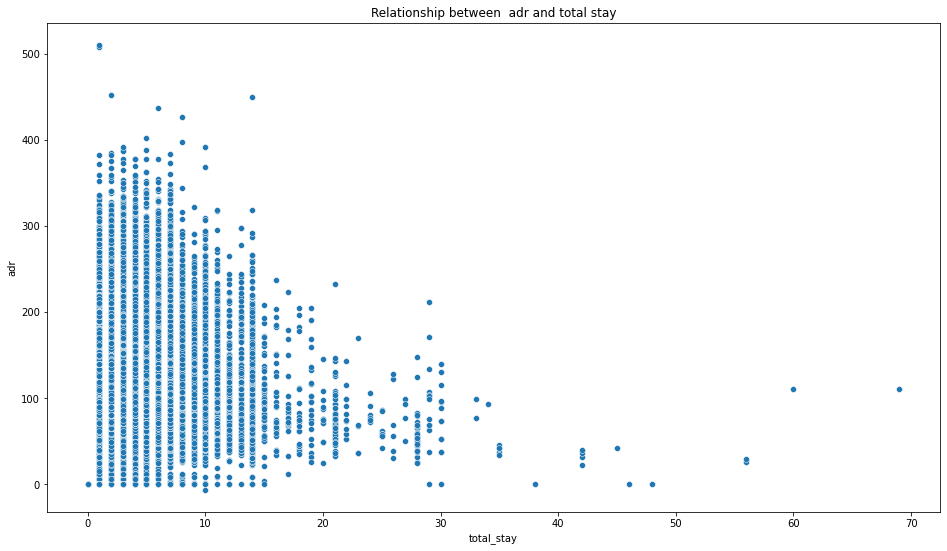

In [70]:
plt.figure(figsize=(16,9))
sns.scatterplot(x=df1['total_stay'],y=df1['adr'])   #using scatter plot
plt.title('Relationship between  adr and total stay')

From the above scatter we can say, as the stay increases ADR is decreasing. Thus for longer stays customer can get good ADR.

**ADR relationship with total number of people:**

Text(0, 0.5, 'ADR')

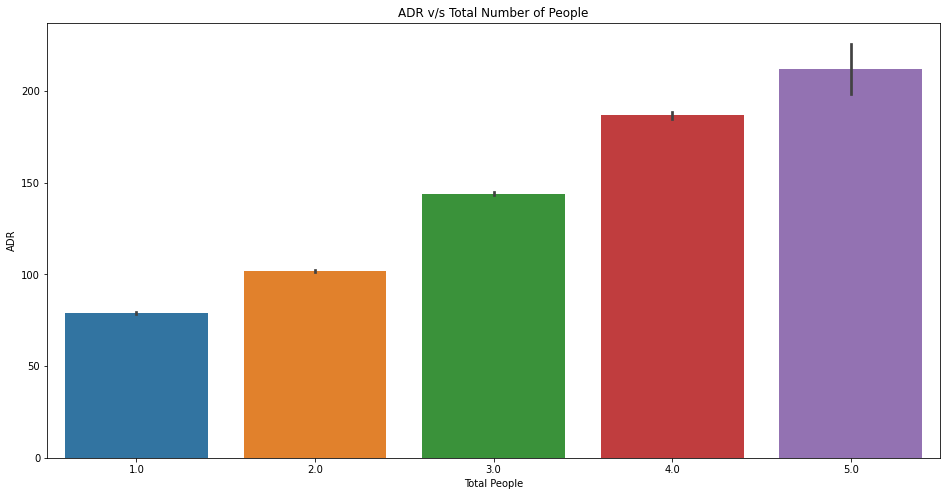

In [71]:
plt.figure(figsize=(16,8))
df2=df1[df1['total_people'] < 6]

sns.barplot(x=df2['total_people'],y=df2['adr'])  

plt.title('ADR v/s Total Number of People')
plt.xlabel('Total People')
plt.ylabel('ADR')

As the total number of people increases, ADR also increases.
Thus ADR and total people are directly proportional to each other.

# **Conclusions:**

---
City hotels are the most preferred hotel type by the guests. We can say City hotel is the busiest hotel.

27.5 % bookings were got cancelled out of all the bookings.


Only 3.9 % people were revisited the hotels. Rest 96.1 % were new guests. Thus retention rate is low.

The percentage of 0 changes made in the booking was more than 82 %. Percentage of Single changes made was about 10%.

Most of the customers (91.6%) do not require car parking spaces.

79.1 % bookings were made through TA/TO (travel agents/Tour operators).

BB( Bed & Breakfast) is the most preferred type of meal by the guests.

Maximum number of guests were from Portugal, i.e. more than 25000 guests.

Most of the bookings for City hotels and Resort hotel were happened in 2016.

Average ADR for city hotel is high as compared to resort hotels. These 
City hotels are generating more revenue than the resort hotels.

Booking cancellation rate is high for City hotels which almost 30 %.

Average lead time for resort hotel is high.

Waiting time period for City hotel is high as compared to resort hotels. That means city hotels are much busier than Resort hotels.

Resort hotels have the most repeated guests.

Optimal stay in both the type hotel is less than 7 days. Usually people stay for a week.

Almost 19 % people did not cancel their bookings even after not getting the same room which they reserved while booking hotel. Only 2.5 % people cancelled the booking.